In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from solvers import FEM_HelmholtzImpedance, Exact_HelmholtzImpedance_const
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.autolayout"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/d/CSE/2021-22-SPR/MCSS/Helmholtz-VPINNs/src/solvers.py:147: SyntaxWarning: "is" with a literal. Did you mean "=="?
  # intfv = self.intg(fv)


## Defining the parameters of the equation

In [66]:
f = lambda x: 1  # Source function
k = 10 * (np.pi / 2)  # frequency
a, b = -1, +1  # Domain
ga, gb = 0, 1  # Values at the boundaries

N = 100  # Number of elements

## Solving the equation

In [67]:
solver = FEM_HelmholtzImpedance(f(0), k, a, b, ga, gb, N=N, N_quad=100, source='const')
solver.solve()
r, r_x = solver.sol, solver.der
u, u_x = Exact_HelmholtzImpedance_const(f(0), k, a, b, ga, gb)

/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


## Plotting the basis functions

In [68]:
# fig, ax = plt.subplots()
# xpts = np.linspace(a, b, solver.N + 1)
# # for i in range(solver.N + 1):
#     ypts = solver.phi_x(i)(xpts)
#     ax.plot(xpts, ypts)
# ax.set_ylim([-1, 2])
# ax.set_xlim([a - .5, b + .5])

## Plotting the solver matrices

In [69]:
# print('Condition number of A:', np.linalg.cond(solver.A))

# plt.rcParams['figure.figsize'] = [10, 5]
# fig, axs = plt.subplots(4, 2)
# fig.tight_layout(pad=3.0)

# for Arow in solver.A:
#     axs[0, 0].plot(Arow.real)
#     axs[0, 1].plot(Arow.imag)
# axs[0, 0].set_title('Re(A)')
# axs[0, 0].grid()
# axs[0, 1].set_title('Im(A)')
# axs[0, 1].grid()

# axs[1, 0].plot(solver.d.real)
# axs[1, 0].set_title('Re(d)')
# axs[1, 0].grid()
# axs[1, 1].plot(solver.d.imag)
# axs[1, 1].set_title('Im(d)')
# axs[1, 1].grid()

# axs[2, 0].plot(solver.c.real)
# axs[2, 0].set_title('Re(c)')
# axs[2, 0].grid()
# axs[2, 1].plot(solver.c.imag)
# axs[2, 1].set_title('Im(c)')
# axs[2, 1].grid()

# axs[3, 0].plot((solver.A @ solver.c - solver.d).real)
# axs[3, 0].set_title('Re(err)')
# axs[3, 0].grid()
# axs[3, 1].plot((solver.A @ solver.c - solver.d).imag)
# axs[3, 1].set_title('Im(err)')
# axs[3, 1].grid()


## Evaluating the result

In [70]:
errs = solver.H1_error(u, u_x)
print(f'H1-error: \t\t{errs[0]:.2e}')
print(f'Solution L2-error: \t{errs[1]:.2e}')
print(f'Derivative L2-error: {errs[2]:.2e}')

H1-error: 		1.05e-01
Solution L2-error: 	7.51e-03
Derivative L2-error: 9.78e-02


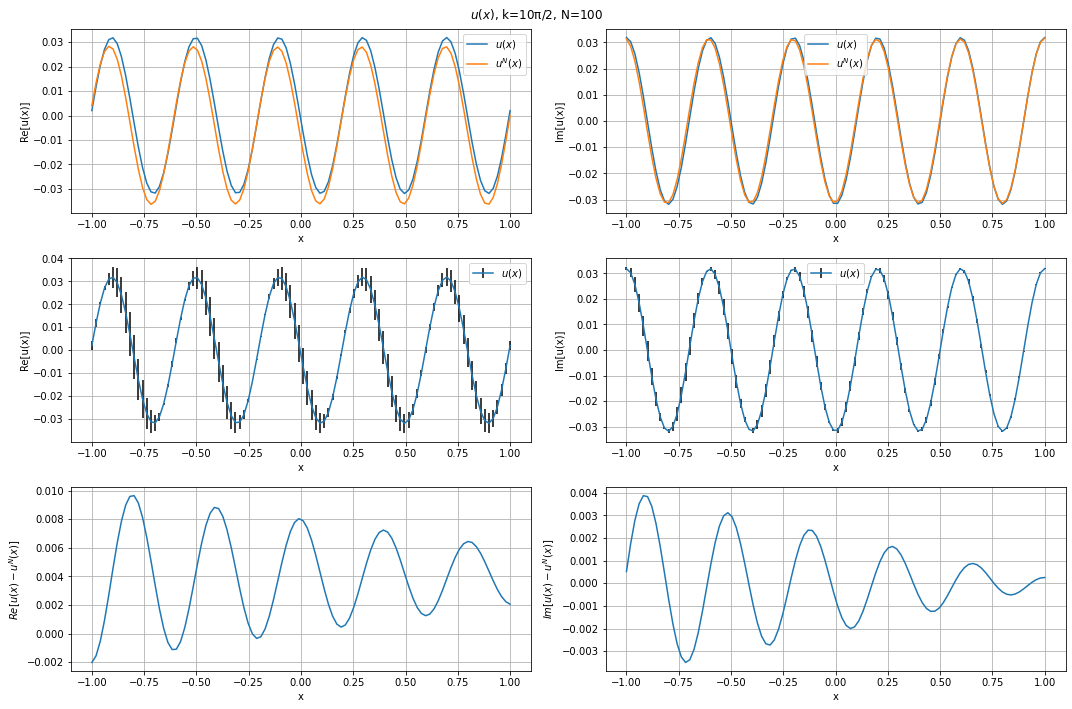

In [71]:
xpts = np.linspace(a, b, solver.N)
upts = np.zeros_like(xpts, dtype=complex)
rpts = np.zeros_like(xpts, dtype=complex)

for i, x in enumerate(xpts):
    upts[i] = u(x)
    rpts[i] = r(x)

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=4.0)
fig.suptitle(f'$u(x)$, k={round(solver.k / (np.pi / 2))}π/2, N={solver.N}')

axs[0, 0].plot(xpts, upts.real, label='$u(x)$')
axs[0, 0].plot(xpts, rpts.real, label='$u^N(x)$')
axs[0, 0].set(xlabel='x', ylabel='Re[u(x)]')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(xpts, upts.imag, label='$u(x)$')
axs[0, 1].plot(xpts, rpts.imag, label='$u^N(x)$')
axs[0, 1].set(xlabel='x', ylabel='Im[u(x)]')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black', label='$u(x)$')
axs[1, 0].set(xlabel='x', ylabel='Re[u(x)]')
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black', label='$u(x)$')
axs[1, 1].set(xlabel='x', ylabel='Im[u(x)]')
axs[1, 1].legend()
axs[1, 1].grid()

axs[2, 0].plot(xpts, upts.real - rpts.real)
axs[2, 0].set(xlabel='x', ylabel='$Re[u(x)-u^N(x)]$')
axs[2, 0].grid()
axs[2, 1].plot(xpts, upts.imag - rpts.imag)
axs[2, 1].set(xlabel='x', ylabel='$Im[u(x)-u^N(x)]$')
axs[2, 1].grid()

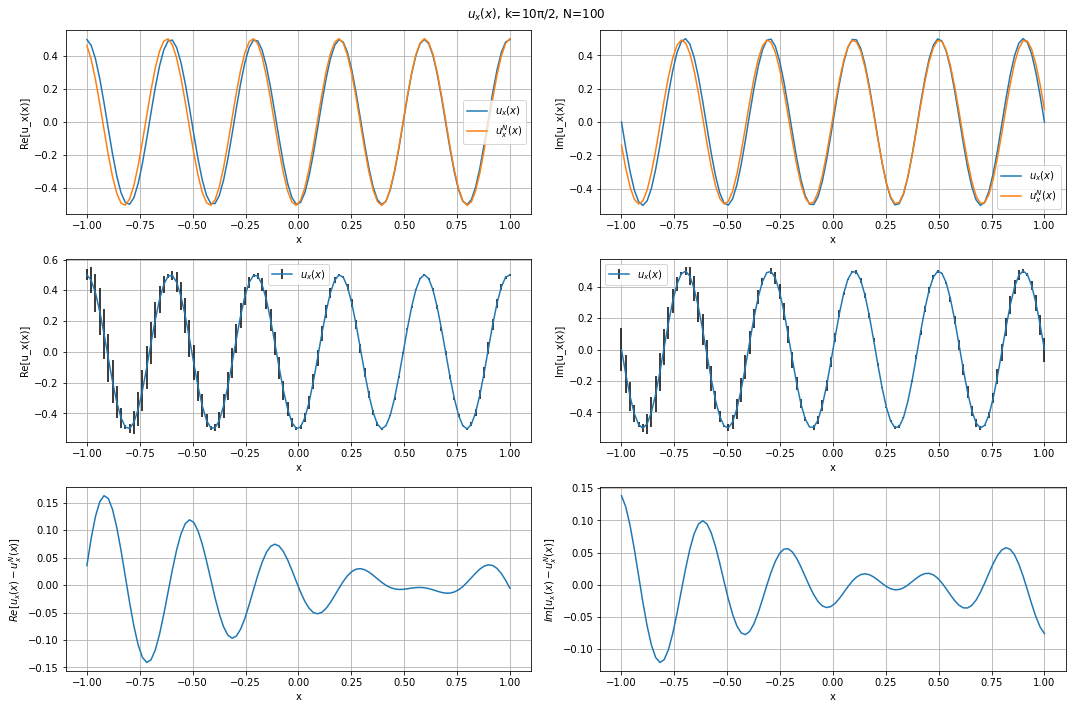

In [72]:
xpts = np.linspace(a, b, solver.N)
upts = np.zeros_like(xpts, dtype=complex)
rpts = np.zeros_like(xpts, dtype=complex)

for i, x in enumerate(xpts):
    upts[i] = u_x(x)
    rpts[i] = r_x(x)

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=4.0)
fig.suptitle(f'$u_x(x)$, k={round(solver.k / (np.pi / 2))}π/2, N={solver.N}')

axs[0, 0].plot(xpts, upts.real, label='$u_x(x)$')
axs[0, 0].plot(xpts, rpts.real, label='$u^N_x(x)$')
axs[0, 0].set(xlabel='x', ylabel='Re[u_x(x)]')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(xpts, upts.imag, label='$u_x(x)$')
axs[0, 1].plot(xpts, rpts.imag, label='$u^N_x(x)$')
axs[0, 1].set(xlabel='x', ylabel='Im[u_x(x)]')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black', label='$u_x(x)$')
axs[1, 0].set(xlabel='x', ylabel='Re[u_x(x)]')
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black', label='$u_x(x)$')
axs[1, 1].set(xlabel='x', ylabel='Im[u_x(x)]')
axs[1, 1].legend()
axs[1, 1].grid()

axs[2, 0].plot(xpts, upts.real - rpts.real)
axs[2, 0].set(xlabel='x', ylabel='$Re[u_x(x)-u^N_x(x)]$')
axs[2, 0].grid()
axs[2, 1].plot(xpts, upts.imag - rpts.imag)
axs[2, 1].set(xlabel='x', ylabel='$Im[u_x(x)-u^N_x(x)]$')
axs[2, 1].grid()